# Problem 1

## Part a
Plot the indifference curves for the value function

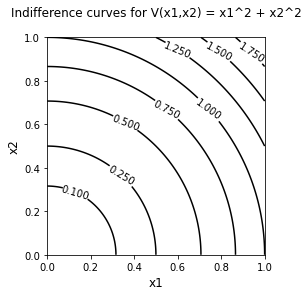

In [68]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0,1,101)
x2 = np.linspace(0,1,101)
xx,yy = np.meshgrid(x1,x2)

V = xx**2 + yy**2

plot = plt.contour(xx,yy,V,colors='k',levels=[.1,.25,.5,.75,1,1.25,1.5,1.75])
plt.clabel(plot)
plt.title('Indifference curves for V(x1,x2) = x1^2 + x2^2\n')
plt.xlabel('x1',fontsize=12)
plt.ylabel('x2',fontsize=12)
plt.axis('square')
plt.show()

## Part b
Determine the multi-attribute utility function of the two attributes and create a surface plot of the utility function

The problem will be divided into two areas:

1. The first region exists where the value function is $V \leq$ 1.  In this space, the utility function can be projected to different indifference curves based on the function $u_1(x_1)=x_1^3$ when $x_2=0$.  In practice, this means that the utility along the x axis of the above plot will provide known values.  These values can then be moved along indifference curves to determine the utility when the value is $V \leq 1$.

\begin{align}
\notag V &= x_1^2 + x_2^2 \\
\notag u_1(x_1)&=x_1^3 \; \text{where: } x_2=0 \\
\notag \text{and: } U(x_1,x_2) &= (x_1^{*})^3 \; \text{where: } x_1^{*} = \sqrt{x_1^2 + x_2^2} \\
\notag U(x_1,x_2) &= {\sqrt{x_1^2 + x_2^2}}^3 \\
\notag \text{so: } U(x_1,x_2) &= \big(x_1^2 + x_2^2\big)^{3/2} \; \text{when: } V \leq 1 \\
\end{align}

2. The second region exists where the value function is $V \geq 1$.  In this space, the utility function can be projected to different indifference curves based on the function $u_2(x_2) = 3x_2$ when $x_1 =1$.  In practice, this means that the utility along the vertical line at $x_1=1$ will provide known values.  These values can then be moved along indifference curves to determine the utiility when the value is $V \geq 1$.  In order to make this function continuous on the surface, you will note that there is a vertical shift of 1 in the utility function for this second region.  This is acceptable as it is simply a linear transformation of the utility function.

\begin{align}
\notag V &= x_1^2 + x_2^2 \\
\notag u_2(x_2)&=3x_2 \; \text{where: } x_1=1 \\
\notag \text{and: } U(x_1,x_2) &= 3x_2^{*} \; \text{where: } x_2^{*} = \sqrt{x_1^2 + x_2^2 - 1} \\
\notag \text{so: } U(x_1,x_2) &= 3 \sqrt{x_1^2 + x_2^2 -1}+1 \; \text{when: } V \geq 1 \\
\end{align}

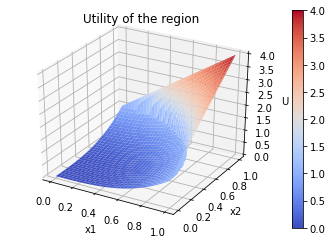

In [97]:
U = np.zeros([len(xx),len(yy)])

for i in range(len(xx)):
    for j in range(len(yy)):
        if V[i,j] >= 1:
            U[i,j] = 3*np.sqrt(xx[i,j]**2+yy[i,j]**2-1)+1.
        else:
            U[i,j] = (xx[i,j]**2+yy[i,j]**2)**(3/2)

from matplotlib import cm

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(xx, yy, U,cmap=cm.coolwarm,vmin=0,vmax=4)
ax.set_title('Utility of the region')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('U')
fig.colorbar(surf)
plt.show()

## Part c
Determine and plot the single attribute utility function for $x_2 =0.5$

This utility can be determined by taking the slice from the above plotted surface at $x_2=.5$

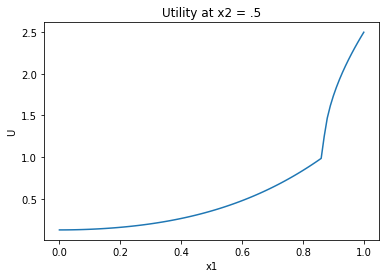

In [112]:
plt.plot(xx[50],U[50,:])
plt.title('Utility at x2 = .5')
plt.xlabel('x1')
plt.ylabel('U')
plt.show()

\break

# Problem 2
Determine which utility functions exhibit conditional independence and for which attribute

## Part a
$u(x_1,x_2) = x_2^3 + \frac{x_2 x_1^2}{x_1+5}$

The function can be defined in the following way:

$u(x_1,x_2) = x_2 \big( x_2^2 + \frac{x_1^2}{x_1+5} \big)$

This function is conditionally independent in $x_1$ for all $x_2 > 0$ where the utility is a function of $x_1$ and has an applied positive linear transformation that is a function of $x_2$.

## Part b
$u(x_1,x_2) = x_2^4(5+4 \, \text{exp}(x_1))$

This function is utility independent in $x_1$ for all $x_2$.  The utility is a function of $x_1$ and has an applied linear transformation where it is multiplied by $x_2^4$

## Part c
$u(x_1,x_2)=0.4 \big( 1- \, \text{exp}(-x_1)+0.6(2-\, \text{exp}(-x_2) \big)$

There is no independence in this function.  The utility is a direct function of both $x_1$ and $x_2$

## Part d
$u(x_1,x_2)=0.3( 1- \, \text{exp}(-x_1))+0.5(2-\, \text{exp}(-x_2)) +.2(1- \, \text{exp}(-x_1))(2- \, \text{exp}(-x_2))$

This function does not exhibit independence because of the final term. If the multiplication is expanded, it is clear that the utility will depend on $\text{exp}(-x_1-x_2$).  This means that there will not be a possible linear combination to define utility for these two attributes.

\break

# Problem 3
## Part a
Assess and plot a single attribute utility function for the cost over a range of \$1,000 to \$3,000

For the utility of cost, I will define myself as risk neutral.  This is defined by a straight line.  I will assign a utility of .2 at a cost of \$3,000 and a utility of 1.0 at \$1,000.  This means that I would prefer to pay as little as possible, but if there is enough planning before purchasing the MacBook then I will still be able to pay whatever amount needed with minimal risk.  I also am acknowledging that \$1,000 is likely the minimum amount that I would be required to pay, or that any MacBook under \$1,000 will not be a viable alternative due to probability of damage or defects.

The data set below is shown in the following plot:

|Price [\$]| utility [0-1]|
|---|---|
|3,000|0.2|
|2,000|0.6|
|1,000|1.0|

And can be defined by the following function: $u_1(x_1) = \frac{-x_1}{2500} + 1.4$


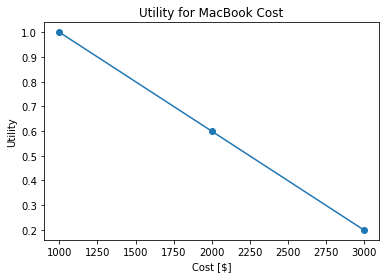

In [143]:
x = [1000,2000,3000]
u = [1.0,0.6,0.2]

plt.plot(x,u)
plt.scatter(x,u)
plt.title('Utility for MacBook Cost')
plt.xlabel('Cost [$]')
plt.ylabel('Utility')
plt.show()

\break

## Part b
Assess your own utility function for life of the MacBook from 0 to 60 months of life.

In this case, I would tend to be risk averse.  This means that I would find increasingly more utility in higher numbers and less utility in shorter lives.  A sample table for these values can be seen below:

|Life [months]| utility [0-1]|
|---|---|
|0|0|
|20|0.55|
|40|0.85|
|50|0.95|
|60|1.0|

And this data is estimated using a polynomial approximation:  $u2 = -.00025x_2^2+.0314x_2$

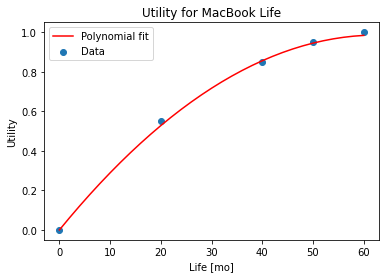

In [146]:
life = [0,20,40,50,60]
u = [0,0.55,0.85,0.95,1.0]

def u2_func(x2):
    return -.00025*x2**2+.0314*x2

x2 = np.linspace(0,60,31)
u2 = u2_func(x2)

plt.scatter(life,u,label='Data')
plt.plot(x2,u2,color='red',label='Polynomial fit')
plt.title('Utility for MacBook Life')
plt.xlabel('Life [mo]')
plt.ylabel('Utility')
plt.legend()
plt.show()

## Part c
Are your preferences in parts (a) and (b) mutually utility independent?

In this case, the problem has modeled the problems as utility independent.  When making this decision on my own, I would tend to generate a multi-attribute utility function to describe the decision.  One strategy that I may consider would be the cost of owning a computer over time.  If a laptop is twice as expensive, but likely will last less than twice the life, then I would not choose that selection.  Overall, I would rather pay \$1,000 every 3 years in place of \$3,000 every 5 years.  This would lead to a better average cost per year over a time period (say, 10 years) and would be the more effective strategy for owning a MacBook at all times.  It is obvious that the two attributes are very dependent on one another.

Imagine that you paid \$1,000 for the computer. Now assess a certainty equivalent (in terms of computer life) for a 50-50 gamble between your computer’s life being 12 months and 60 months.  Compare this result to the certainty equivalent if you paid \$3,000.

These two certainty equivalents will be the same because the utility function for life has no function of cost, $x_1$.  In this case, the certainty equivalent can be seen below:

\begin{align}
\notag .5u_2(12)+.5u_2(60) &= .6624 \\
\notag u2(26.82) &= .6624
\end{align}

In [169]:
from sympy.solvers import solve
from sympy import Symbol
x = Symbol('x')

[est1,est2] = solve(u2_func(x)-.5*u2_func(12)-.5*u2_func(60), x)

print('Target certainty equivalent =\t\t%.4f'%(.5*u2_func(12)+.5*u2_func(60)))
print('Estimated certainty equivalent =\t%.4f'%u2_func(est1))
print('Certainty equivalent (months) =\t\t%.2f'%est1)

Target certainty equivalent =		0.6624
Estimated certainty equivalent =	0.6624
Certainty equivalent (months) =		26.82


## Part d
Assuming mutual and additive independence, assess $k_1$ and $k_2$ in the additive utility function over the cost of the computer and life, $U(x_1,x_2) = k_1 u_1 (x_1)+k_2u_2(x_2)$

To simulate an isopreference curve, we have assigned the following two points as indifferent to the decision maker:

| Cost [\$]|Life [months]|
|---|---|
|2800|42|
|1400|30|

We then solve the following system of equations:

\begin{align}
\notag k_1u_1(2800)+k_2u_2(42) &= k_1u_1(1400)+k_2u_2(30) \\
\notag k_1+k_2 &= 1
\end{align}

In [203]:
def u1_func(x1):
    return (-1*x1/2500)+1.4

coeffMatrix = np.array(([u1_func(2800)-u1_func(1400), u2_func(42)-u2_func(30)],[1,1]))
solnMatrix = np.array(([0,1]))

[k1,k2] = np.linalg.solve(coeffMatrix, solnMatrix)

print('k1 =\t%.4f'%k1)
print('k2 =\t%.4f'%k2)

k1 =	0.2231
k2 =	0.7769


## Part e
Assume that the probability density function can be applied to the life of the MacBook.  Choose the best Alternative based on the multi-attribute utility function defined above.

First, the expected lives are determined using the PDF and assigned to each attribute array:

In [245]:
from scipy.integrate import quad

def expected_life(x,life_initial):
    k = 10
    lam = 40
    x_shift = x+life_initial
    return x*(k/lam)*(x_shift/lam)**(k-1)*np.exp(-1*(x_shift/lam)**k)

A0 = [3000,quad(expected_life,0,60,args=(0))[0]]
A1 = [1500,quad(expected_life,0,60,args=(24))[0]]
A2 = [2000,quad(expected_life,0,60,args=(18))[0]]
A3 = [2500,quad(expected_life,0,60,args=(12))[0]]

Next, we apply each of these alternatives to the multi-attribute utility function determined in part d:

In [261]:
def mau_func(A):
    return k1*u1_func(A[0])+k2*u2_func(A[1])

U0 = mau_func(A0)
U1 = mau_func(A1)
U2 = mau_func(A2)
U3 = mau_func(A3)

print('Alternative:\tCost[$]:\tExpected Life[mo]:\tUtility:')
print('0\t\t%i\t\t%.2f\t\t\t%.2f'%(A0[0],A0[1],U0))
print('1\t\t%i\t\t%.2f\t\t\t%.2f'%(A1[0],A1[1],U1))
print('2\t\t%i\t\t%.2f\t\t\t%.2f'%(A2[0],A2[1],U2))
print('3\t\t%i\t\t%.2f\t\t\t%.2f'%(A3[0],A3[1],U3))

Alternative:	Cost[$]:	Expected Life[mo]:	Utility:
0		3000		38.05			0.69
1		1500		14.07			0.48
2		2000		20.05			0.54
3		2500		26.05			0.59


This process was able to identify a new MacBook (alternative 0) as the preferred decision to the decision maker.  